In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import math
import statistics
!pip install tweepy==4.9.0

In [4]:
df= pd.read_csv('milkeurope.csv', encoding='latin1')

In [5]:
df.head()

,year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.9,5877.10,...,NaN,NaN,NaN,NaN,13581.9,NaN,NaN,NaN,NaN,NaN
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.0,5838.20,...,NaN,NaN,NaN,3446.00,13804.5,NaN,NaN,NaN,NaN,NaN
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.4,6089.03,...,NaN,NaN,NaN,3444.16,13590.7,23.3,NaN,NaN,NaN,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.6,5948.80,...,NaN,NaN,NaN,3399.69,13687.4,25.3,NaN,NaN,NaN,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.6,6647.28,...,NaN,NaN,NaN,3511.67,14828.8,25.6,NaN,95.1,817.77,8625.7


In [6]:
df.shape

(12, 38)

In [7]:
df.describe()

,year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,0.0,0.0,7.000000,11.000000,10.000000,8.000000,2.000000,8.000000,7.000000,10.000000
mean,2015.500000,3883.571667,572.036667,2709.756667,5281.758333,31286.421667,718.655833,6845.495833,629.128333,6702.229167,...,NaN,NaN,1556.661429,3421.239091,14498.779000,25.341250,109.275000,106.535000,864.697143,9118.930000
std,3.605551,390.252724,70.552521,352.969142,332.401112,1234.026981,54.513396,1340.904979,25.164788,615.877015,...,NaN,NaN,18.580449,41.582534,756.636122,1.857544,6.441743,10.924822,29.455700,779.382432
min,2010.000000,3406.090000,488.500000,2312.230000,4799.900000,29075.970000,621.100000,5327.010000,601.500000,5838.200000,...,NaN,NaN,1526.400000,3372.090000,13581.900000,23.300000,104.720000,93.860000,817.770000,7932.500000
25%,2012.750000,3467.675000,513.232500,2369.175000,5001.050000,30167.125000,695.397500,5569.967500,605.600000,6053.972500,...,NaN,NaN,1543.965000,3390.205000,13716.675000,23.700000,106.997500,99.765000,853.220000,8702.825000
50%,2015.500000,3934.890000,556.840000,2637.375000,5321.200000,31908.075000,723.595000,6719.295000,626.935000,6851.850000,...,NaN,NaN,1565.200000,3409.540000,14685.465000,25.350000,109.275000,104.050000,862.080000,9162.600000
75%,2018.250000,4206.225000,645.127500,3043.137500,5615.000000,32090.100000,751.832500,7915.875000,642.412500,7150.600000,...,NaN,NaN,1570.800000,3445.080000,15177.242500,26.182500,111.552500,112.350000,879.465000,9757.325000
max,2021.000000,4431.000000,680.540000,3192.020000,5666.000000,32552.120000,799.240000,9021.100000,672.900000,7476.920000,...,NaN,NaN,1575.500000,3511.670000,15428.590000,28.000000,113.830000,123.700000,907.660000,10051.900000


In [8]:
df.info

<bound method DataFrame.info of     year  Belgium  Bulgaria  Czechia  Denmark   Germany  Estonia  Ireland  \
0   2010  3406.09    564.55  2312.23   4830.2  29075.97   621.10  5327.01   
1   2011  3446.39    549.13  2366.10   4799.9  29764.48   642.30  5536.45   
2   2012  3412.01    513.98  2428.77   4926.8  29703.46   665.09  5379.30   
3   2013  3474.77    510.99  2358.42   5025.8  30301.34   705.50  5581.14   
4   2014  3689.44    494.54  2370.20   5109.7  31375.28   729.96  5801.96   
5   2015  3988.15    488.50  2481.55   5278.2  31879.13   720.40  6585.09   
6   2016  3881.63    524.04  2793.20   5364.2  31972.73   714.72  6853.50   
7   2017  4025.42    578.79  2979.34   5506.3  31937.02   726.79  7480.40   
8   2018  4178.89    643.00  3033.02   5615.0  32490.95   748.07  7812.60   
9   2019  4288.23    651.51  3073.49   5615.0  32442.21   763.12  8225.70   
10  2020  4431.00    680.54  3192.02   5666.0  32552.12   787.58  8541.70   
11  2021  4380.84    664.87  3128.74   5644.

In [9]:
#Check for duplicate input of same car, can be seen with tata at bottom of list
df.loc[df.duplicated()]

,year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey


In [10]:
df.isnull().sum()

year                0
Belgium             0
Bulgaria            0
Czechia             0
Denmark             0
Germany             0
Estonia             0
Ireland             0
Greece              0
Spain               0
France              0
Croatia             0
Italy               0
Cyprus              0
Latvia              0
Lithuania           0
Luxembourg          3
Hungary             0
Malta               3
Netherlands         0
Austria             0
Poland              0
Portugal            0
Romania             0
Slovenia            0
Slovakia            0
Finland             0
Sweden              0
Iceland            12
Liechtenstein      12
Norway              5
Switzerland         1
United Kingdom      2
Montenegro          4
North Macedonia    10
Albania             4
Serbia              5
Turkey              2
dtype: int64

In [11]:
df

,year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.90,5877.10,...,NaN,NaN,NaN,NaN,13581.90,NaN,NaN,NaN,NaN,NaN
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.00,5838.20,...,NaN,NaN,NaN,3446.00,13804.50,NaN,NaN,NaN,NaN,NaN
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.40,6089.03,...,NaN,NaN,NaN,3444.16,13590.70,23.30,NaN,NaN,NaN,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.60,5948.80,...,NaN,NaN,NaN,3399.69,13687.40,25.30,NaN,NaN,NaN,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.60,6647.28,...,NaN,NaN,NaN,3511.67,14828.80,25.60,NaN,95.10,817.77,8625.7
5,2015,3988.15,488.50,2481.55,5278.2,31879.13,720.40,6585.09,602.60,6764.73,...,NaN,NaN,1569.50,3457.43,15191.00,23.40,NaN,105.20,861.81,8934.2
6,2016,3881.63,524.04,2793.20,5364.2,31972.73,714.72,6853.50,601.50,6938.97,...,NaN,NaN,1572.10,3406.80,14542.13,23.80,NaN,102.90,844.63,9213.5
7,2017,4025.42,578.79,2979.34,5506.3,31937.02,726.79,7480.40,602.50,7027.67,...,NaN,NaN,1542.90,3409.54,15144.67,25.40,NaN,109.60,862.08,9111.7
8,2018,4178.89,643.00,3033.02,5615.0,32490.95,748.07,7812.60,620.90,7117.01,...,NaN,NaN,1565.20,3426.38,15188.10,28.00,113.83,120.60,867.14,10034.2
9,2019,4288.23,651.51,3073.49,5615.0,32442.21,763.12,8225.70,632.97,7251.37,...,NaN,NaN,1526.40,3372.09,15428.59,27.93,104.72,123.70,NaN,9506.0


# Drop Empty Cells

In [12]:
df.isnull().sum()

year                0
Belgium             0
Bulgaria            0
Czechia             0
Denmark             0
Germany             0
Estonia             0
Ireland             0
Greece              0
Spain               0
France              0
Croatia             0
Italy               0
Cyprus              0
Latvia              0
Lithuania           0
Luxembourg          3
Hungary             0
Malta               3
Netherlands         0
Austria             0
Poland              0
Portugal            0
Romania             0
Slovenia            0
Slovakia            0
Finland             0
Sweden              0
Iceland            12
Liechtenstein      12
Norway              5
Switzerland         1
United Kingdom      2
Montenegro          4
North Macedonia    10
Albania             4
Serbia              5
Turkey              2
dtype: int64

In [13]:
df.replace(np.nan,'0',inplace = True)

In [14]:
df.isnull().sum()

year               0
Belgium            0
Bulgaria           0
Czechia            0
Denmark            0
Germany            0
Estonia            0
Ireland            0
Greece             0
Spain              0
France             0
Croatia            0
Italy              0
Cyprus             0
Latvia             0
Lithuania          0
Luxembourg         0
Hungary            0
Malta              0
Netherlands        0
Austria            0
Poland             0
Portugal           0
Romania            0
Slovenia           0
Slovakia           0
Finland            0
Sweden             0
Iceland            0
Liechtenstein      0
Norway             0
Switzerland        0
United Kingdom     0
Montenegro         0
North Macedonia    0
Albania            0
Serbia             0
Turkey             0
dtype: int64

In [15]:
df = df.astype(float)

In [16]:
df["year"] = df["year"].apply(np.int64)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             12 non-null     int64  
 1   Belgium          12 non-null     float64
 2   Bulgaria         12 non-null     float64
 3   Czechia          12 non-null     float64
 4   Denmark          12 non-null     float64
 5   Germany          12 non-null     float64
 6   Estonia          12 non-null     float64
 7   Ireland          12 non-null     float64
 8   Greece           12 non-null     float64
 9   Spain            12 non-null     float64
 10  France           12 non-null     float64
 11  Croatia          12 non-null     float64
 12  Italy            12 non-null     float64
 13  Cyprus           12 non-null     float64
 14  Latvia           12 non-null     float64
 15  Lithuania        12 non-null     float64
 16  Luxembourg       12 non-null     float64
 17  Hungary          1

In [18]:
df=df.rename(columns={'year' : 'Year',
               })

In [19]:
df.head()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.9,5877.10,...,0.0,0.0,0.0,0.00,13581.9,0.0,0.0,0.0,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.0,5838.20,...,0.0,0.0,0.0,3446.00,13804.5,0.0,0.0,0.0,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.4,6089.03,...,0.0,0.0,0.0,3444.16,13590.7,23.3,0.0,0.0,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.6,5948.80,...,0.0,0.0,0.0,3399.69,13687.4,25.3,0.0,0.0,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.6,6647.28,...,0.0,0.0,0.0,3511.67,14828.8,25.6,0.0,95.1,817.77,8625.7


In [22]:
datastats= df

In [23]:
datastats.head()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.9,5877.10,...,0.0,0.0,0.0,0.00,13581.9,0.0,0.0,0.0,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.0,5838.20,...,0.0,0.0,0.0,3446.00,13804.5,0.0,0.0,0.0,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.4,6089.03,...,0.0,0.0,0.0,3444.16,13590.7,23.3,0.0,0.0,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.6,5948.80,...,0.0,0.0,0.0,3399.69,13687.4,25.3,0.0,0.0,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.6,6647.28,...,0.0,0.0,0.0,3511.67,14828.8,25.6,0.0,95.1,817.77,8625.7


In [24]:
datastats=datastats.astype(int)

In [29]:
datastats.head()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406,564,2312,4830,29075,621,5327,672,5877,...,0,0,0,0,13581,0,0,0,0,0
1,2011,3446,549,2366,4799,29764,642,5536,639,5838,...,0,0,0,3446,13804,0,0,0,0,0
2,2012,3412,513,2428,4926,29703,665,5379,637,6089,...,0,0,0,3444,13590,23,0,0,0,7932
3,2013,3474,510,2358,5025,30301,705,5581,606,5948,...,0,0,0,3399,13687,25,0,0,0,7938
4,2014,3689,494,2370,5109,31375,729,5801,614,6647,...,0,0,0,3511,14828,25,0,95,817,8625


In [25]:
# Select the columns to compare
data1 = datastats['Belgium']
data2 = datastats['Ireland']

In [26]:
t, p = stats.ttest_ind(data1, data2)
print("t = ", t)
print("p = ", p)

t =  -7.347409786377999
p =  2.352845725109377e-07


In [27]:
mu1 = statistics.mean(data1)
print(mu1)

3883.1666666666665


In [28]:
mu2 = statistics.mean(data2)
print(mu2)

6845.083333333333


In [30]:
populationmean= datastats

In [31]:
populationmean.head()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Iceland,Liechtenstein,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406,564,2312,4830,29075,621,5327,672,5877,...,0,0,0,0,13581,0,0,0,0,0
1,2011,3446,549,2366,4799,29764,642,5536,639,5838,...,0,0,0,3446,13804,0,0,0,0,0
2,2012,3412,513,2428,4926,29703,665,5379,637,6089,...,0,0,0,3444,13590,23,0,0,0,7932
3,2013,3474,510,2358,5025,30301,705,5581,606,5948,...,0,0,0,3399,13687,25,0,0,0,7938
4,2014,3689,494,2370,5109,31375,729,5801,614,6647,...,0,0,0,3511,14828,25,0,95,817,8625


In [32]:
mupop = np.mean(populationmean)

In [33]:
mupop

Year                2015.500000
Belgium             3883.166667
Bulgaria             571.500000
Czechia             2709.416667
Denmark             5281.416667
Germany            31286.000000
Estonia              718.250000
Ireland             6845.083333
Greece               628.500000
Spain               6701.750000
France             24561.333333
Croatia              508.666667
Italy              11449.583333
Cyprus               200.250000
Latvia               763.500000
Lithuania           1368.000000
Luxembourg           240.916667
Hungary             1496.833333
Malta                 30.750000
Netherlands        13077.750000
Austria             3052.166667
Poland             10955.916667
Portugal            1867.666667
Romania              997.250000
Slovenia             552.666667
Slovakia             827.333333
Finland             2325.250000
Sweden              2833.500000
Iceland                0.000000
Liechtenstein          0.000000
Norway               907.833333
Switzerl

In [34]:
#one sample t-test
# Select the column to test
datattest = datastats['Ireland']

# Set the population mean
mu = 7461.5532409167

# Perform the one-sample t-test
t, p = stats.ttest_1samp(data2, mu)
print("t = ", t)
print("p = ", p)

t =  -1.5926693989603755
p =  0.1395414503343531


In [35]:
#The t-test compares the sample mean to the population mean and returns the t-statistic and the p-value.


In [36]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [37]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)

2.009575234489209

In [38]:
stats.t.cdf(x= -1.592,      # T-test statistic
               df= 49) * 2 # Multiply by two for two tailed test *

0.1178161696568192

In [39]:
# A p-value of 0.1178 means we'd expect to see data as extreme as our sample due to chance about 11.8% of the time if the null hypothesis was true

In [40]:
sigma = data2.std()/math.sqrt(36)             # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 35,                     # Degrees of freedom # the degrees of freedom is equal to the sample size minus 1
                 loc = data2.mean(),          # Sample mean
                 scale= sigma)                # Standard dev estimate

(6391.40843985722, 7298.758226809446)

# Confidence Intervals

In [41]:
confidencepopulationmean= 7461.5532409167

In [42]:
# Set the confidence level
confidence_level = 0.95

In [43]:
interval = stats.t.interval(confidence_level, len(datastats)-1, loc=confidencepopulationmean, scale=stats.sem(datastats))
print(interval)

(array([7459.26238293, 7213.63234222, 7416.70553425, 7237.27576605,
       7250.17314833, 6677.41778927, 7426.95660695, 6609.62432264,
       7445.61594732, 7070.33947948, 7144.80291805, 7415.48020889,
       6901.37860713, 7429.12490437, 7420.02204304, 7431.18694454,
       7366.02875674, 7379.35700466, 7449.75293897, 6778.29044303,
       7377.71821577, 6679.32846829, 7432.84780719, 7395.14674561,
       7444.9354312 , 7450.10268959, 7428.70772296, 7417.77053147,
                 nan,           nan, 6952.30807887, 6833.61742393,
       3849.59270212, 7453.71304797, 7434.6916315 , 7427.93882343,
       7178.49370064, 5162.33051712]), array([ 7463.8440989 ,  7709.47413962,  7506.40094758,  7685.83071578,
        7672.9333335 ,  8245.68869256,  7496.14987488,  8313.48215919,
        7477.49053452,  7852.76700235,  7778.30356378,  7507.62627294,
        8021.7278747 ,  7493.98157747,  7503.08443879,  7491.9195373 ,
        7557.07772509,  7543.74947717,  7473.35354286,  8144.8160388 ,
  

In [44]:
# Calculate the standard deviation of the entire dataset
sigma = statistics.pstdev(data2)
print(sigma)

1283.75630205096


In [45]:
sample_size = 36
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = sigma  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(6248.591758286743, 7087.297130602145)


# Anova

In [46]:
anova1 = datastats['Ireland']
anova2 = datastats['Turkey']
anova3 = datastats['Denmark']

# Perform the ANOVA
f, p = stats.f_oneway(anova1, anova2, anova3)
print("F = ", f)
print("p = ", p)

F =  3.352426458371317
p =  0.04726729478608715


In [47]:
#The test output yields an F-statistic of 3.3524 and a p-value of 0.0472, indicating that there is no significant difference between the means of each group.

In [48]:
# Perform the Wilcoxon test
t, p = stats.wilcoxon(data1, data2)
print("t = ", t)
print("p = ", p)

t =  0.0
p =  0.00048828125


# end of stats

# Drop uk as englands not part of eu for analysis

In [49]:
df = df.drop('United Kingdom', axis=1)

In [50]:
df.head()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.9,5877.10,...,2862.21,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.0,5838.20,...,2850.40,0.0,0.0,0.0,3446.00,0.0,0.0,0.0,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.4,6089.03,...,2861.17,0.0,0.0,0.0,3444.16,23.3,0.0,0.0,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.6,5948.80,...,2869.58,0.0,0.0,0.0,3399.69,25.3,0.0,0.0,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.6,6647.28,...,2931.25,0.0,0.0,0.0,3511.67,25.6,0.0,95.1,817.77,8625.7


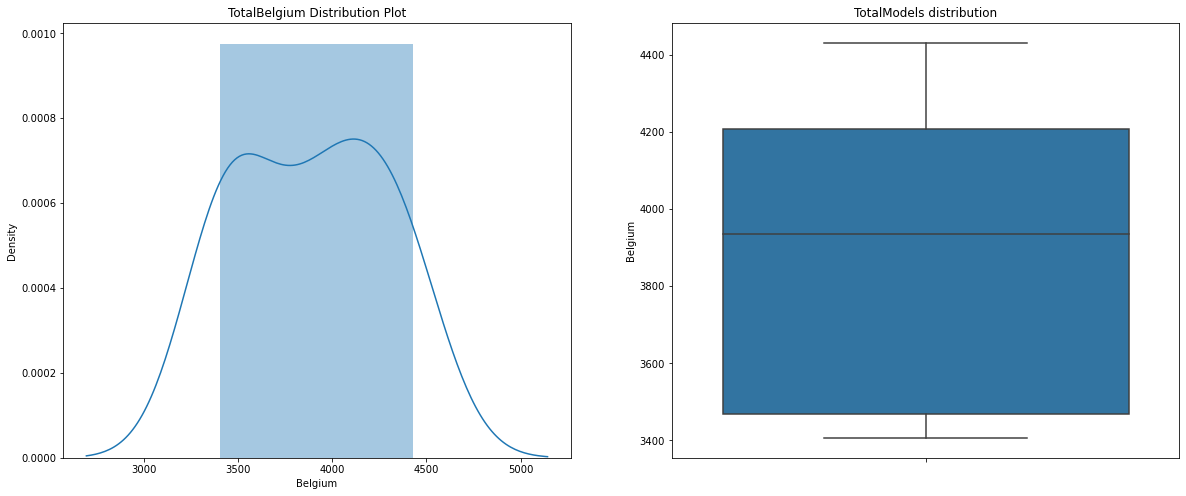

In [51]:
#visualize the data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('TotalBelgium Distribution Plot')
sns.distplot(df.Belgium)

plt.subplot(1,2,2)
plt.title('TotalModels distribution')
sns.boxplot(y=df.Belgium)

plt.show()

[Text(0.5, 0, 'Distribution Year'), Text(0, 0.5, 'Frequency of Year Model')]

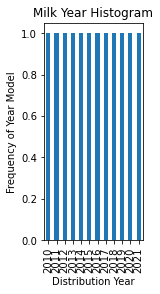

In [52]:
plt.subplot(1,3,3)
plt1 = df.Year.value_counts().plot(kind='bar')
plt.title('Milk Year Histogram')
plt1.set(xlabel = 'Distribution Year', ylabel='Frequency of Year Model')

In [53]:
df

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.90,5877.10,...,2862.21,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.00,5838.20,...,2850.40,0.0,0.0,0.00,3446.00,0.00,0.00,0.00,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.40,6089.03,...,2861.17,0.0,0.0,0.00,3444.16,23.30,0.00,0.00,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.60,5948.80,...,2869.58,0.0,0.0,0.00,3399.69,25.30,0.00,0.00,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.60,6647.28,...,2931.25,0.0,0.0,0.00,3511.67,25.60,0.00,95.10,817.77,8625.7
5,2015,3988.15,488.50,2481.55,5278.2,31879.13,720.40,6585.09,602.60,6764.73,...,2933.16,0.0,0.0,1569.50,3457.43,23.40,0.00,105.20,861.81,8934.2
6,2016,3881.63,524.04,2793.20,5364.2,31972.73,714.72,6853.50,601.50,6938.97,...,2862.23,0.0,0.0,1572.10,3406.80,23.80,0.00,102.90,844.63,9213.5
7,2017,4025.42,578.79,2979.34,5506.3,31937.02,726.79,7480.40,602.50,7027.67,...,2816.66,0.0,0.0,1542.90,3409.54,25.40,0.00,109.60,862.08,9111.7
8,2018,4178.89,643.00,3033.02,5615.0,32490.95,748.07,7812.60,620.90,7117.01,...,2760.23,0.0,0.0,1565.20,3426.38,28.00,113.83,120.60,867.14,10034.2
9,2019,4288.23,651.51,3073.49,5615.0,32442.21,763.12,8225.70,632.97,7251.37,...,2704.39,0.0,0.0,1526.40,3372.09,27.93,104.72,123.70,0.00,9506.0


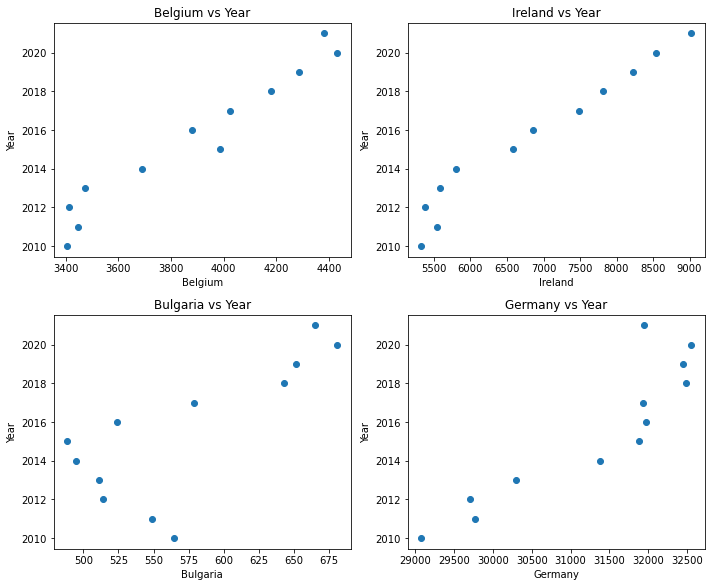

In [54]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Year'])
    plt.title(x+' vs Year')
    plt.ylabel('Year')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Belgium', 1)
scatter('Ireland', 2)
scatter('Bulgaria', 3)
scatter('Germany', 4)

plt.tight_layout()

In [55]:
np.corrcoef(df['Year'], df['Ireland'])[0, 1]

0.9784195909588583

In [56]:
np.corrcoef(df['Year'], df['Bulgaria'])[0, 1]

0.7499960598332461

In [57]:
np.corrcoef(df['Year'], df['Belgium'])[0, 1]

0.9736275664515903

In [58]:
np.corrcoef(df['Year'], df['Germany'])[0, 1]

0.9042927478429446

In [59]:
df.corr()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
Year,1.000000,0.973628,0.749996,0.944344,0.977970,0.904293,0.959948,0.978420,0.024628,0.970143,...,-0.666169,NaN,NaN,0.855112,0.457353,0.045863,0.385548,0.819012,0.634319,0.774660
Belgium,0.973628,1.000000,0.765879,0.931428,0.971845,0.915193,0.915466,0.977298,0.062133,0.972417,...,-0.651517,NaN,NaN,0.897607,0.363838,-0.013440,0.415746,0.857339,0.652377,0.691613
Bulgaria,0.749996,0.765879,1.000000,0.857414,0.726031,0.515882,0.619169,0.840362,0.538587,0.676885,...,-0.909990,NaN,NaN,0.562760,0.004881,-0.369181,0.496298,0.429869,0.210201,0.259156
Czechia,0.944344,0.931428,0.857414,1.000000,0.951052,0.825424,0.826844,0.967967,0.120742,0.916972,...,-0.812542,NaN,NaN,0.853074,0.327237,-0.029203,0.452978,0.745937,0.531660,0.633294
Denmark,0.977970,0.971845,0.726031,0.951052,1.000000,0.939982,0.918459,0.959898,-0.070111,0.972648,...,-0.667877,NaN,NaN,0.909185,0.405447,0.153877,0.467793,0.877972,0.662709,0.784168
Germany,0.904293,0.915193,0.515882,0.825424,0.939982,1.000000,0.893470,0.847213,-0.314840,0.938582,...,-0.470881,NaN,NaN,0.886898,0.550881,0.311950,0.446628,0.957031,0.744026,0.815475
Estonia,0.959948,0.915466,0.619169,0.826844,0.918459,0.893470,1.000000,0.893193,-0.064558,0.923329,...,-0.514414,NaN,NaN,0.741497,0.546265,0.123126,0.313500,0.794714,0.652282,0.842255
Ireland,0.978420,0.977298,0.840362,0.967967,0.959898,0.847213,0.893193,1.000000,0.159477,0.946434,...,-0.742564,NaN,NaN,0.867011,0.330786,-0.091801,0.405417,0.774190,0.577106,0.641633
Greece,0.024628,0.062133,0.538587,0.120742,-0.070111,-0.314840,-0.064558,0.159477,1.000000,-0.023650,...,-0.355719,NaN,NaN,-0.175127,-0.559594,-0.812779,-0.045334,-0.313505,-0.275606,-0.416747
Spain,0.970143,0.972417,0.676885,0.916972,0.972648,0.938582,0.923329,0.946434,-0.023650,1.000000,...,-0.571841,NaN,NaN,0.890266,0.404126,0.088796,0.363031,0.909899,0.734555,0.771337


<AxesSubplot:>

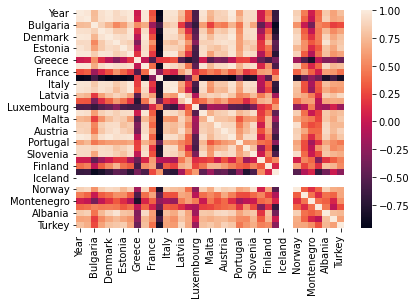

In [60]:
#correlation heatmap
sns.heatmap(df.corr())

<AxesSubplot:>

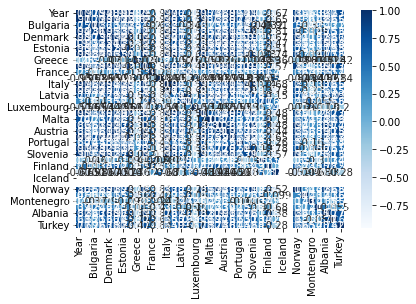

In [61]:
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [62]:
df1_lr= df[['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland','Greece','Spain', 'France', 'Croatia', 'Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Liechtenstein','Norway','Switzerland','Montenegro','North Macedonia','Albania','Serbia','Turkey']]
df1_lr.head()

,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.9,5877.10,23576.31,...,2862.21,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.0,5838.20,24697.75,...,2850.40,0.0,0.0,0.0,3446.00,0.0,0.0,0.0,0.00,0.0
2,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.4,6089.03,24252.76,...,2861.17,0.0,0.0,0.0,3444.16,23.3,0.0,0.0,0.00,7932.5
3,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.6,5948.80,23994.45,...,2869.58,0.0,0.0,0.0,3399.69,25.3,0.0,0.0,0.00,7938.5
4,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.6,6647.28,25275.72,...,2931.25,0.0,0.0,0.0,3511.67,25.6,0.0,95.1,817.77,8625.7


# Dummy Variables

In [64]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [65]:
df

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.90,5877.10,...,2862.21,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.00,5838.20,...,2850.40,0.0,0.0,0.00,3446.00,0.00,0.00,0.00,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.40,6089.03,...,2861.17,0.0,0.0,0.00,3444.16,23.30,0.00,0.00,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.60,5948.80,...,2869.58,0.0,0.0,0.00,3399.69,25.30,0.00,0.00,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.60,6647.28,...,2931.25,0.0,0.0,0.00,3511.67,25.60,0.00,95.10,817.77,8625.7
5,2015,3988.15,488.50,2481.55,5278.2,31879.13,720.40,6585.09,602.60,6764.73,...,2933.16,0.0,0.0,1569.50,3457.43,23.40,0.00,105.20,861.81,8934.2
6,2016,3881.63,524.04,2793.20,5364.2,31972.73,714.72,6853.50,601.50,6938.97,...,2862.23,0.0,0.0,1572.10,3406.80,23.80,0.00,102.90,844.63,9213.5
7,2017,4025.42,578.79,2979.34,5506.3,31937.02,726.79,7480.40,602.50,7027.67,...,2816.66,0.0,0.0,1542.90,3409.54,25.40,0.00,109.60,862.08,9111.7
8,2018,4178.89,643.00,3033.02,5615.0,32490.95,748.07,7812.60,620.90,7117.01,...,2760.23,0.0,0.0,1565.20,3426.38,28.00,113.83,120.60,867.14,10034.2
9,2019,4288.23,651.51,3073.49,5615.0,32442.21,763.12,8225.70,632.97,7251.37,...,2704.39,0.0,0.0,1526.40,3372.09,27.93,104.72,123.70,0.00,9506.0


# Train test

In [66]:
#traintest split and feature scaling
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
df_test

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
9,2019,4288.23,651.51,3073.49,5615.0,32442.21,763.12,8225.70,632.97,7251.37,...,2704.39,0.0,0.0,1526.4,3372.09,27.93,104.72,123.7,0.00,9506.0
6,2016,3881.63,524.04,2793.20,5364.2,31972.73,714.72,6853.50,601.50,6938.97,...,2862.23,0.0,0.0,1572.1,3406.80,23.80,0.00,102.9,844.63,9213.5
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.00,5838.20,...,2850.40,0.0,0.0,0.0,3446.00,0.00,0.00,0.0,0.00,0.0
5,2015,3988.15,488.50,2481.55,5278.2,31879.13,720.40,6585.09,602.60,6764.73,...,2933.16,0.0,0.0,1569.5,3457.43,23.40,0.00,105.2,861.81,8934.2


In [68]:
df

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.90,5877.10,...,2862.21,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.00,5838.20,...,2850.40,0.0,0.0,0.00,3446.00,0.00,0.00,0.00,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.40,6089.03,...,2861.17,0.0,0.0,0.00,3444.16,23.30,0.00,0.00,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.60,5948.80,...,2869.58,0.0,0.0,0.00,3399.69,25.30,0.00,0.00,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.60,6647.28,...,2931.25,0.0,0.0,0.00,3511.67,25.60,0.00,95.10,817.77,8625.7
5,2015,3988.15,488.50,2481.55,5278.2,31879.13,720.40,6585.09,602.60,6764.73,...,2933.16,0.0,0.0,1569.50,3457.43,23.40,0.00,105.20,861.81,8934.2
6,2016,3881.63,524.04,2793.20,5364.2,31972.73,714.72,6853.50,601.50,6938.97,...,2862.23,0.0,0.0,1572.10,3406.80,23.80,0.00,102.90,844.63,9213.5
7,2017,4025.42,578.79,2979.34,5506.3,31937.02,726.79,7480.40,602.50,7027.67,...,2816.66,0.0,0.0,1542.90,3409.54,25.40,0.00,109.60,862.08,9111.7
8,2018,4178.89,643.00,3033.02,5615.0,32490.95,748.07,7812.60,620.90,7117.01,...,2760.23,0.0,0.0,1565.20,3426.38,28.00,113.83,120.60,867.14,10034.2
9,2019,4288.23,651.51,3073.49,5615.0,32442.21,763.12,8225.70,632.97,7251.37,...,2704.39,0.0,0.0,1526.40,3372.09,27.93,104.72,123.70,0.00,9506.0


In [69]:
df_train

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.60,6647.28,...,2931.25,0.0,0.0,0.00,3511.67,25.6,0.00,95.10,817.77,8625.7
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.40,6089.03,...,2861.17,0.0,0.0,0.00,3444.16,23.3,0.00,0.00,0.00,7932.5
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.90,5877.10,...,2862.21,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
10,2020,4431.00,680.54,3192.02,5666.0,32552.12,787.58,8541.70,652.65,7449.67,...,2772.74,0.0,0.0,1545.03,3379.15,0.0,0.00,101.32,907.66,9841.1
7,2017,4025.42,578.79,2979.34,5506.3,31937.02,726.79,7480.40,602.50,7027.67,...,2816.66,0.0,0.0,1542.90,3409.54,25.4,0.00,109.60,862.08,9111.7
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.60,5948.80,...,2869.58,0.0,0.0,0.00,3399.69,25.3,0.00,0.00,0.00,7938.5
11,2021,4380.84,664.87,3128.74,5644.0,31942.37,799.24,9021.10,665.92,7476.92,...,2782.22,0.0,0.0,1575.50,3380.72,0.0,0.00,93.86,891.79,10051.9
8,2018,4178.89,643.00,3033.02,5615.0,32490.95,748.07,7812.60,620.90,7117.01,...,2760.23,0.0,0.0,1565.20,3426.38,28.0,113.83,120.60,867.14,10034.2


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland','Greece','Spain', 'France', 'Croatia', 'Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Liechtenstein','Norway','Switzerland','Montenegro','North Macedonia','Albania','Serbia','Turkey']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [71]:
df_train.head()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
4,2014,0.276463,0.000000,0.065891,0.334410,0.661453,0.611092,0.128570,0.171875,0.481417,...,1.000000,0.0,0.0,0.000000,1.000000,0.914286,0.0,0.788557,0.900965,0.858116
2,2012,0.005776,0.104516,0.132463,0.115578,0.180513,0.246941,0.014155,0.495739,0.132471,...,0.590223,0.0,0.0,0.000000,0.980776,0.832143,0.0,0.000000,0.000000,0.789154
0,2010,0.000000,0.376398,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.596305,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
10,2020,1.000000,1.000000,1.000000,1.000000,1.000000,0.934546,0.870225,0.712358,0.982967,...,0.073149,0.0,0.0,0.980660,0.962263,0.000000,0.0,0.840133,1.000000,0.979029
7,2017,0.604277,0.452957,0.758260,0.808926,0.823051,0.593297,0.582928,0.000000,0.719187,...,0.329961,0.0,0.0,0.979308,0.970917,0.907143,0.0,0.908789,0.949783,0.906465


In [72]:
df_train.describe()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.0,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2015.625000,0.457326,0.467030,0.469558,0.550700,0.603065,0.571552,0.417191,0.450053,0.516986,...,0.419702,0.0,0.0,0.494179,0.852561,0.569643,0.125000,0.539469,0.598578,0.790094
std,3.961872,0.421899,0.395752,0.442115,0.420525,0.379351,0.333576,0.410385,0.386487,0.413564,...,0.345239,0.0,0.0,0.528340,0.344701,0.473857,0.353553,0.452144,0.496489,0.330692
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.750000,0.051702,0.100497,0.062543,0.204415,0.309509,0.417074,0.055134,0.143466,0.110558,...,0.114723,0.0,0.0,0.000000,0.962598,0.000000,0.000000,0.000000,0.000000,0.789602
50%,2015.500000,0.440370,0.414677,0.445362,0.571668,0.742252,0.602195,0.355749,0.378551,0.600302,...,0.460092,0.0,0.0,0.489654,0.969515,0.867857,0.000000,0.783416,0.925374,0.882291
75%,2018.500000,0.803278,0.827567,0.846475,0.947655,0.864044,0.768202,0.722198,0.759482,0.827015,...,0.607078,0.0,0.0,0.983861,0.976978,0.908929,0.000000,0.857297,0.962147,0.983831
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


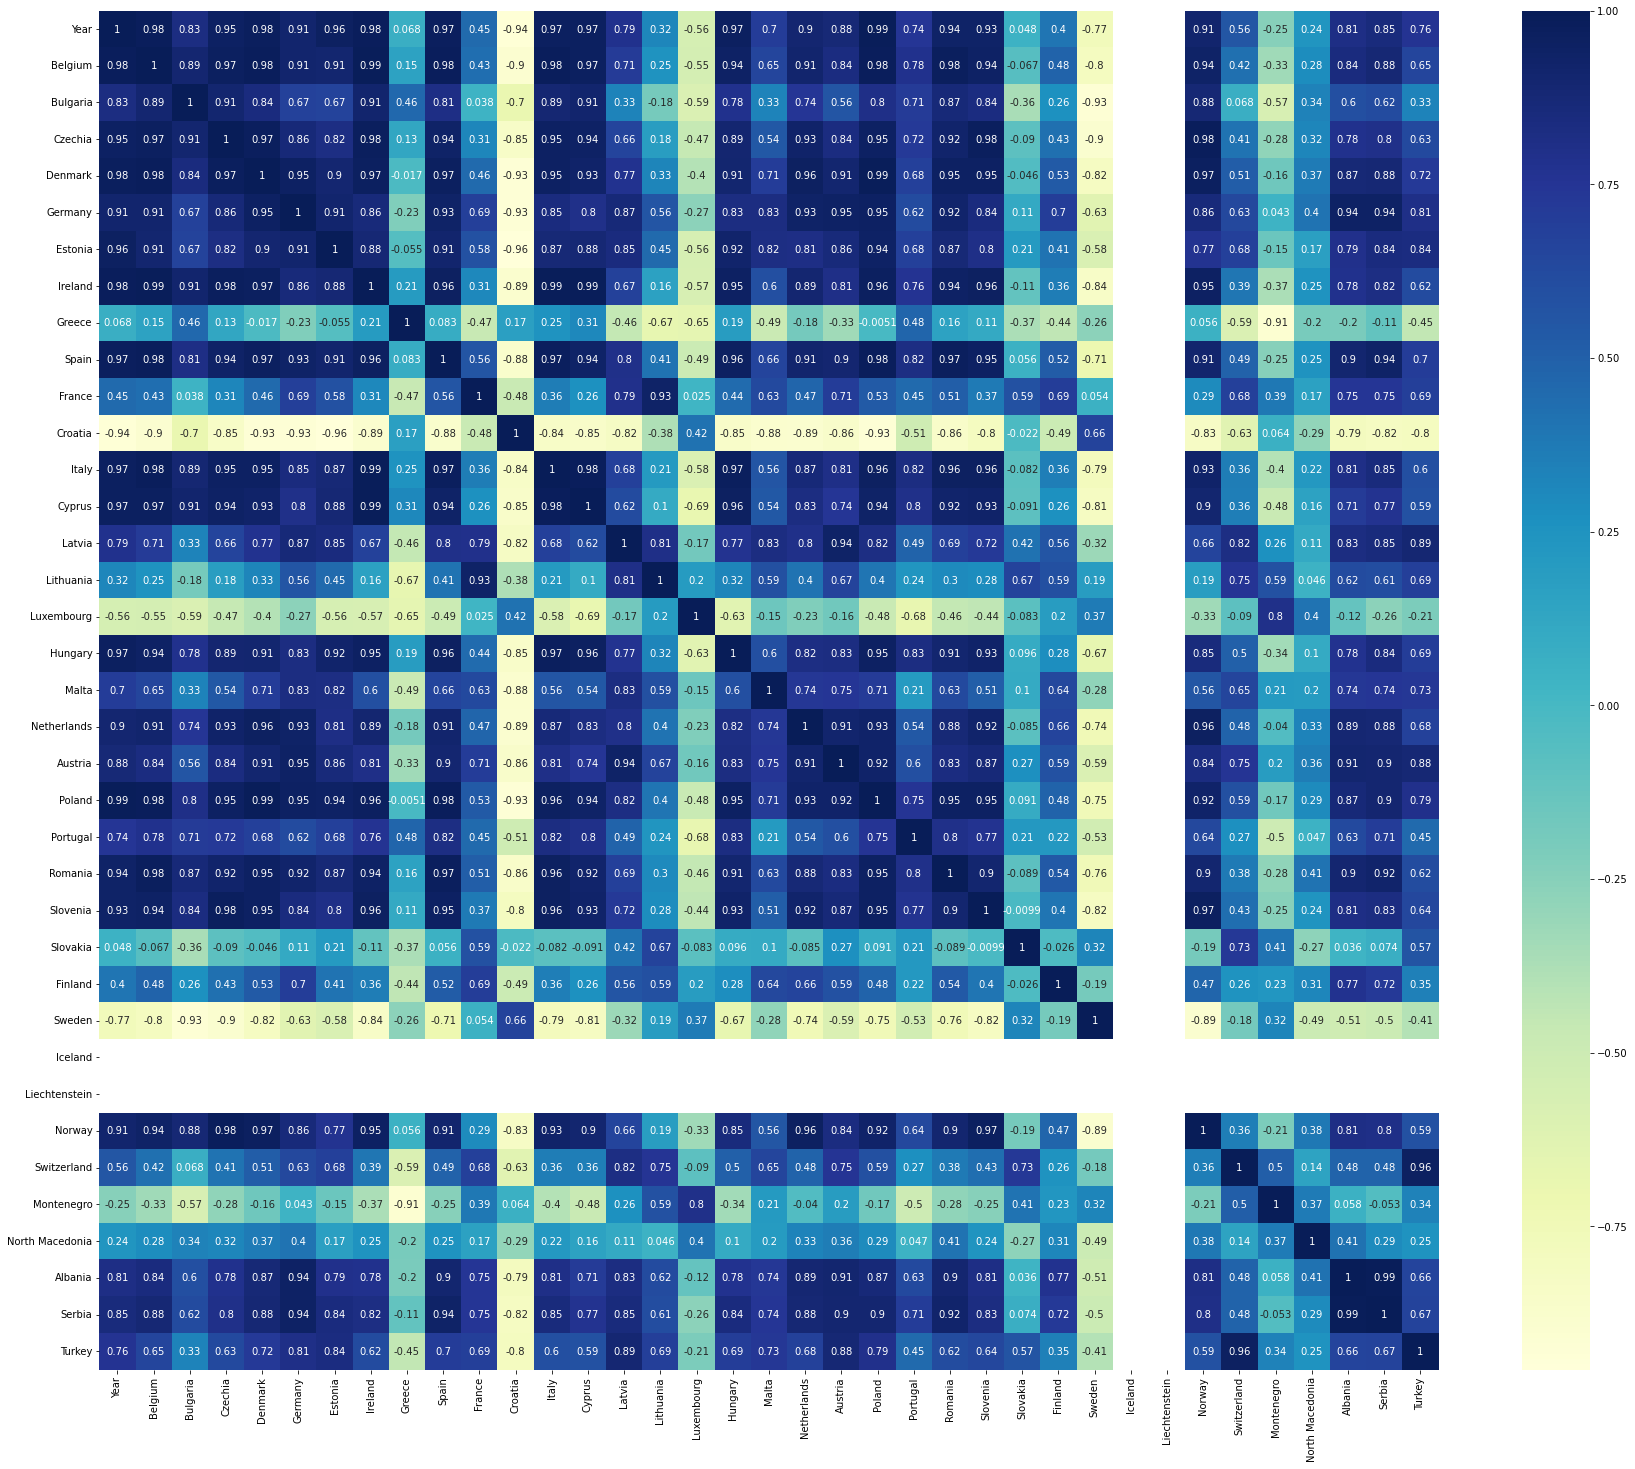

In [73]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [74]:
#Dividing data into X and y variables
y_train = df_train.drop(['Year','Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia','Greece','Spain', 'France', 'Croatia', 'Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Liechtenstein','Norway','Switzerland','Montenegro','North Macedonia','Albania','Serbia','Turkey'], axis=1)

In [75]:
y_train

,Ireland
4,0.128570
2,0.014155
0,0.000000
10,0.870225
7,0.582928
3,0.068794
11,1.000000
8,0.672856


In [76]:
len(y_train)

8

In [77]:
x_train= df_train.drop(['Ireland'], axis=1)

In [78]:
x_train

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
4,2014,0.276463,0.000000,0.065891,0.334410,0.661453,0.611092,0.171875,0.481417,1.000000,...,1.000000,0.0,0.0,0.000000,1.000000,0.914286,0.0,0.788557,0.900965,0.858116
2,2012,0.005776,0.104516,0.132463,0.115578,0.180513,0.246941,0.495739,0.132471,0.398050,...,0.590223,0.0,0.0,0.000000,0.980776,0.832143,0.0,0.000000,0.000000,0.789154
0,2010,0.000000,0.376398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.596305,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
10,2020,1.000000,1.000000,1.000000,1.000000,1.000000,0.934546,0.712358,0.982967,0.651108,...,0.073149,0.0,0.0,0.980660,0.962263,0.000000,0.0,0.840133,1.000000,0.979029
7,2017,0.604277,0.452957,0.758260,0.808926,0.823051,0.593297,0.000000,0.719187,0.600467,...,0.329961,0.0,0.0,0.979308,0.970917,0.907143,0.0,0.908789,0.949783,0.906465
3,2013,0.067011,0.088441,0.052501,0.234027,0.352508,0.473785,0.058239,0.044818,0.246050,...,0.639399,0.0,0.0,0.000000,0.968112,0.903571,0.0,0.000000,0.000000,0.789751
11,2021,0.951059,0.915753,0.928074,0.973678,0.824590,1.000000,0.900852,1.000000,0.430361,...,0.128581,0.0,0.0,1.000000,0.962710,0.000000,0.0,0.778275,0.982515,1.000000
8,2018,0.754017,0.798172,0.819275,0.938981,0.982403,0.712754,0.261364,0.775031,0.616173,...,0.000000,0.0,0.0,0.993462,0.975712,1.000000,1.0,1.000000,0.955358,0.998239


In [79]:
len(x_train)

8

In [80]:
y_test= df_train.drop(['Year','Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia','Greece','Spain', 'France', 'Croatia', 'Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Liechtenstein','Norway','Switzerland','Montenegro','North Macedonia','Albania','Serbia','Turkey'], axis=1)

In [81]:
y_test

,Ireland
4,0.128570
2,0.014155
0,0.000000
10,0.870225
7,0.582928
3,0.068794
11,1.000000
8,0.672856


In [82]:
x_test=df_train.drop(['Ireland'], axis=1)

In [83]:
x_test

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
4,2014,0.276463,0.000000,0.065891,0.334410,0.661453,0.611092,0.171875,0.481417,1.000000,...,1.000000,0.0,0.0,0.000000,1.000000,0.914286,0.0,0.788557,0.900965,0.858116
2,2012,0.005776,0.104516,0.132463,0.115578,0.180513,0.246941,0.495739,0.132471,0.398050,...,0.590223,0.0,0.0,0.000000,0.980776,0.832143,0.0,0.000000,0.000000,0.789154
0,2010,0.000000,0.376398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.596305,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
10,2020,1.000000,1.000000,1.000000,1.000000,1.000000,0.934546,0.712358,0.982967,0.651108,...,0.073149,0.0,0.0,0.980660,0.962263,0.000000,0.0,0.840133,1.000000,0.979029
7,2017,0.604277,0.452957,0.758260,0.808926,0.823051,0.593297,0.000000,0.719187,0.600467,...,0.329961,0.0,0.0,0.979308,0.970917,0.907143,0.0,0.908789,0.949783,0.906465
3,2013,0.067011,0.088441,0.052501,0.234027,0.352508,0.473785,0.058239,0.044818,0.246050,...,0.639399,0.0,0.0,0.000000,0.968112,0.903571,0.0,0.000000,0.000000,0.789751
11,2021,0.951059,0.915753,0.928074,0.973678,0.824590,1.000000,0.900852,1.000000,0.430361,...,0.128581,0.0,0.0,1.000000,0.962710,0.000000,0.0,0.778275,0.982515,1.000000
8,2018,0.754017,0.798172,0.819275,0.938981,0.982403,0.712754,0.261364,0.775031,0.616173,...,0.000000,0.0,0.0,0.993462,0.975712,1.000000,1.0,1.000000,0.955358,0.998239


In [84]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(8, 36) (8, 36)
(8, 1) (8, 1)


In [85]:
x_train.describe()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.0,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2015.625000,0.457326,0.467030,0.469558,0.550700,0.603065,0.571552,0.450053,0.516986,0.492776,...,0.419702,0.0,0.0,0.494179,0.852561,0.569643,0.125000,0.539469,0.598578,0.790094
std,3.961872,0.421899,0.395752,0.442115,0.420525,0.379351,0.333576,0.386487,0.413564,0.298984,...,0.345239,0.0,0.0,0.528340,0.344701,0.473857,0.353553,0.452144,0.496489,0.330692
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.750000,0.051702,0.100497,0.062543,0.204415,0.309509,0.417074,0.143466,0.110558,0.360050,...,0.114723,0.0,0.0,0.000000,0.962598,0.000000,0.000000,0.000000,0.000000,0.789602
50%,2015.500000,0.440370,0.414677,0.445362,0.571668,0.742252,0.602195,0.378551,0.600302,0.515414,...,0.460092,0.0,0.0,0.489654,0.969515,0.867857,0.000000,0.783416,0.925374,0.882291
75%,2018.500000,0.803278,0.827567,0.846475,0.947655,0.864044,0.768202,0.759482,0.827015,0.624907,...,0.607078,0.0,0.0,0.983861,0.976978,0.908929,0.000000,0.857297,0.962147,0.983831
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
print("x_train shape:" + str(x_train.shape))
print("y_train shape:" + str(y_train.shape))
print("x_test shape:" + str(x_test.shape))
print("y_test shape:" + str(y_test.shape))

x_train shape:(8, 36)
y_train shape:(8, 1)
x_test shape:(8, 36)
y_test shape:(8, 1)


# Model Building

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

In [88]:
# instantiate
lm = LinearRegression()
# fit
lm.fit(x_train, y_train)
# predict 
y_pred = lm.predict(x_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

1.0


In [89]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(x_train, y_train)

In [90]:
rfe

RFE(estimator=LinearRegression())

In [91]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Belgium', False, 11),
 ('Bulgaria', False, 6),
 ('Czechia', True, 1),
 ('Denmark', False, 8),
 ('Germany', False, 10),
 ('Estonia', True, 1),
 ('Greece', True, 1),
 ('Spain', False, 9),
 ('France', True, 1),
 ('Croatia', False, 13),
 ('Italy', True, 1),
 ('Cyprus', True, 1),
 ('Latvia', False, 16),
 ('Lithuania', False, 5),
 ('Luxembourg', True, 1),
 ('Hungary', True, 1),
 ('Malta', True, 1),
 ('Netherlands', True, 1),
 ('Austria', False, 12),
 ('Poland', False, 14),
 ('Portugal', False, 17),
 ('Romania', False, 15),
 ('Slovenia', True, 1),
 ('Slovakia', True, 1),
 ('Finland', False, 3),
 ('Sweden', True, 1),
 ('Iceland', False, 19),
 ('Liechtenstein', False, 18),
 ('Norway', True, 1),
 ('Switzerland', True, 1),
 ('Montenegro', True, 1),
 ('North Macedonia', False, 7),
 ('Albania', False, 4),
 ('Serbia', False, 2),
 ('Turkey', True, 1)]

In [92]:
x_train.columns[rfe.support_]

Index(['Year', 'Czechia', 'Estonia', 'Greece', 'France', 'Italy', 'Cyprus',
       'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Slovenia', 'Slovakia',
       'Sweden', 'Norway', 'Switzerland', 'Montenegro', 'Turkey'],
      dtype='object')

# Build model with stats

In [93]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,Year,Czechia,Estonia,Greece,France,Italy,Cyprus,Luxembourg,Hungary,Malta,Netherlands,Slovenia,Slovakia,Sweden,Norway,Switzerland,Montenegro,Turkey
4,2014,0.065891,0.611092,0.171875,1.000000,0.244517,0.092213,0.773950,0.355367,1.000000,0.317205,0.205014,0.852827,1.000000,0.000000,1.000000,0.914286,0.858116
2,2012,0.132463,0.246941,0.495739,0.398050,0.075665,0.017124,0.702999,0.182990,0.000000,0.018458,0.251950,1.000000,0.590223,0.000000,0.980776,0.832143,0.789154
0,2010,0.000000,0.000000,1.000000,0.000000,0.066442,0.000000,0.713790,0.000000,0.000000,0.000000,0.035237,0.000000,0.596305,0.000000,0.000000,0.000000,0.000000
10,2020,1.000000,0.934546,0.712358,0.651108,0.816389,0.843843,0.000000,0.727863,0.984569,0.884152,0.879387,0.629435,0.073149,0.980660,0.962263,0.000000,0.979029
7,2017,0.758260,0.593297,0.000000,0.600467,0.569006,0.444346,0.948250,0.535697,0.959317,1.000000,0.861838,0.505653,0.329961,0.979308,0.970917,0.907143,0.906465


In [94]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [95]:
x_train_m1 = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                Ireland   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                nan
Time:                        01:43:01   Log-Likelihood:                 238.91
No. Observations:                   8   AIC:                            -461.8
Df Residuals:                       0   BIC:                            -461.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0007        inf         -0      

In [96]:
x_train_m1 = x_train_rfe.drop(["Montenegro"], axis = 1)

## model 2

In [97]:
x_train_m1 = build_model(x_train_m1,y_train)

                            OLS Regression Results                            
Dep. Variable:                Ireland   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                nan
Time:                        01:43:29   Log-Likelihood:                 239.56
No. Observations:                   8   AIC:                            -463.1
Df Residuals:                       0   BIC:                            -462.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0007        inf         -0      

In [98]:
x_train_m1 = x_train_m1.drop(["France"], axis = 1)

## model 3

In [99]:
x_train_m1= build_model(x_train_m1,y_train)

                            OLS Regression Results                            
Dep. Variable:                Ireland   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                nan
Time:                        01:43:58   Log-Likelihood:                 238.84
No. Observations:                   8   AIC:                            -461.7
Df Residuals:                       0   BIC:                            -461.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0006        inf         -0      

In [100]:
checkVIF(x_train_m1)

,Features,VIF
8,Hungary,inf
9,Malta,inf
15,Switzerland,inf
14,Norway,inf
13,Sweden,inf
12,Slovakia,inf
11,Slovenia,inf
10,Netherlands,inf
16,Turkey,inf
1,Year,inf


In [101]:
x_train_m1 = x_train_m1.drop(["Sweden"], axis = 1)

## model 4

In [102]:
x_train_m1= build_model(x_train_m1,y_train)

                            OLS Regression Results                            
Dep. Variable:                Ireland   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                nan
Time:                        01:44:40   Log-Likelihood:                 241.34
No. Observations:                   8   AIC:                            -466.7
Df Residuals:                       0   BIC:                            -466.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0007        inf         -0      

In [103]:
x_train_m1 = x_train_m1.drop(["Slovakia"], axis = 1)

## model 5

In [104]:
x_train_m1= build_model(x_train_m1,y_train)

                            OLS Regression Results                            
Dep. Variable:                Ireland   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                nan
Time:                        01:45:14   Log-Likelihood:                 241.42
No. Observations:                   8   AIC:                            -466.8
Df Residuals:                       0   BIC:                            -466.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0011        inf         -0      

# Residual Model Analysis

In [105]:
lm = sm.OLS(y_train,x_train_m1).fit()
y_train_price = lm.predict(x_train_m1)

Text(0.5, 0, 'Errors')

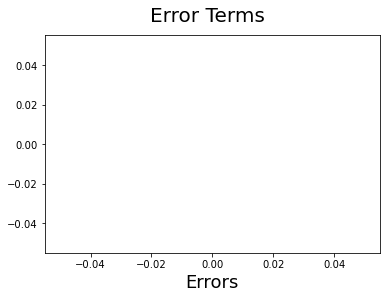

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train.Ireland), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [107]:
x_test.info

<bound method DataFrame.info of     Year   Belgium  Bulgaria   Czechia   Denmark   Germany   Estonia  \
4   2014  0.276463  0.000000  0.065891  0.334410  0.661453  0.611092   
2   2012  0.005776  0.104516  0.132463  0.115578  0.180513  0.246941   
0   2010  0.000000  0.376398  0.000000  0.000000  0.000000  0.000000   
10  2020  1.000000  1.000000  1.000000  1.000000  1.000000  0.934546   
7   2017  0.604277  0.452957  0.758260  0.808926  0.823051  0.593297   
3   2013  0.067011  0.088441  0.052501  0.234027  0.352508  0.473785   
11  2021  0.951059  0.915753  0.928074  0.973678  0.824590  1.000000   
8   2018  0.754017  0.798172  0.819275  0.938981  0.982403  0.712754   

      Greece     Spain    France  ...    Sweden  Iceland  Liechtenstein  \
4   0.171875  0.481417  1.000000  ...  1.000000      0.0            0.0   
2   0.495739  0.132471  0.398050  ...  0.590223      0.0            0.0   
0   1.000000  0.000000  0.000000  ...  0.596305      0.0            0.0   
10  0.712358  0.982

In [108]:
y_test

,Ireland
4,0.128570
2,0.014155
0,0.000000
10,0.870225
7,0.582928
3,0.068794
11,1.000000
8,0.672856


# EvaluatingTheModelUsingStatistics

In [109]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Ireland   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                nan
Time:                        01:46:56   Log-Likelihood:                 241.42
No. Observations:                   8   AIC:                            -466.8
Df Residuals:                       0   BIC:                            -466.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0011        inf         -0      

# UsingDecisionTreeRegressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_absolute_error

In [111]:
def plotPred(Y_pred):
    x_points=np.linspace(0,7e6)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');

Decision Tree Regressor train score:  1.0
Decision Tree Regressor test score:  1.0
Mean absolute error:  0.0
Coefficient of determination:  1.0


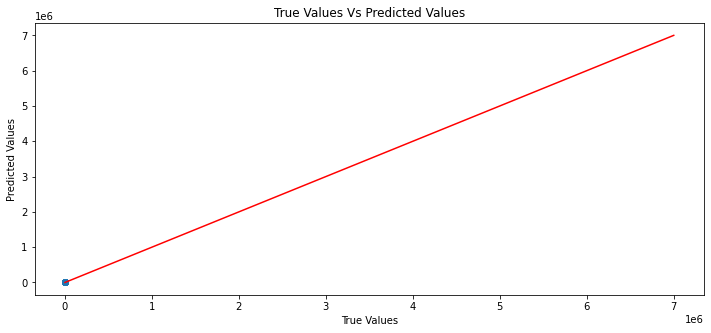

In [112]:
dtreg = DecisionTreeRegressor()
dtreg.fit(x_train, y_train)

# train and test scores
dt_train_score = round(dtreg.score(x_train, y_train), 2)
dt_test_score = round(dtreg.score(x_test, y_test), 2)
# predicted output
Y_pred_dt = dtreg.predict(x_test)

print('Decision Tree Regressor train score: ', dt_train_score)
print('Decision Tree Regressor test score: ', dt_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, Y_pred_dt))
print('Coefficient of determination: ', r2_score(y_test, Y_pred_dt))

# plot predicted vs true values
plotPred(Y_pred_dt)

# RandomForestRegressor

DecisionTree Regressor train score:  0.97
DecisionTree Regressor test score:  0.97
Mean absolute error:  0.05207607962989506
Coefficient of determination:  0.9749919438528345


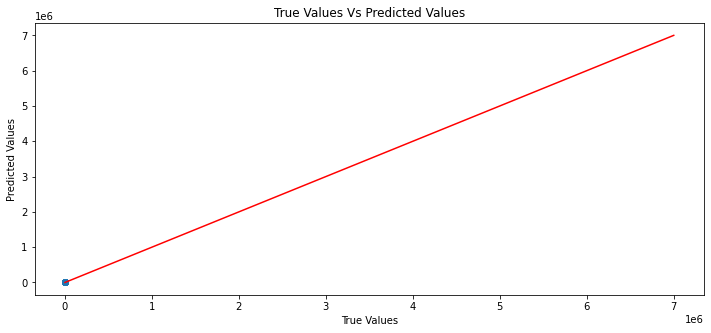

In [113]:
rfreg = RandomForestRegressor()
rfreg.fit(x_train, y_train)

# train and test scores
rf_train_score = round(rfreg.score(x_train, y_train), 2)
rf_test_score = round(rfreg.score(x_test, y_test), 2)
# predicted output
Y_pred_rf = rfreg.predict(x_test)

print('DecisionTree Regressor train score: ', rf_train_score)
print('DecisionTree Regressor test score: ', rf_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, Y_pred_rf))
print('Coefficient of determination: ', r2_score(y_test, Y_pred_rf))

# plot predicted vs true values
plotPred(Y_pred_rf)

# Evaulating Models

In [114]:
y_pred

array([[1.28570230e-01],
       [1.41550422e-02],
       [5.68434189e-14],
       [8.70225143e-01],
       [5.82928407e-01],
       [6.87936677e-02],
       [1.00000000e+00],
       [6.72855832e-01]])

In [115]:
y_train

,Ireland
4,0.128570
2,0.014155
0,0.000000
10,0.870225
7,0.582928
3,0.068794
11,1.000000
8,0.672856


In [116]:
print('The accuracy of train dftra is', r2_score(y_train, y_pred)) 

The accuracy of train dftra is 1.0


In [117]:
print('The accuracy of test df is', r2_score(y_test, y_pred)) 

The accuracy of test df is 1.0


In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [119]:
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,y_pred)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,y_pred))

The RMSE  on the training dataset is:  7.036686018856909e-14
The RMSE  on the testing dataset is:  7.036686018856909e-14

The MAE  on the training dataset is:  5.77871084317394e-14
The MAE  on the testing dataset is:  5.77871084317394e-14


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

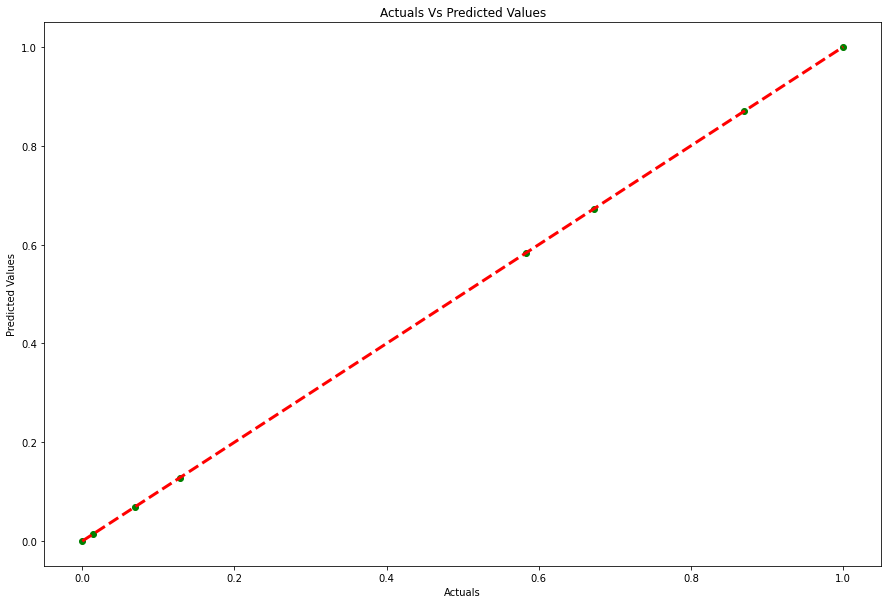

In [120]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

# Cross Validation

In [121]:
CV_train, CV_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 0)

In [122]:
CV_test.astype('int')

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
6,2016,3881,524,2793,5364,31972,714,6853,601,6938,...,2862,0,0,1572,3406,23,0,102,844,9213
11,2021,4380,664,3128,5644,31942,799,9021,665,7476,...,2782,0,0,1575,3380,0,0,93,891,10051
4,2014,3689,494,2370,5109,31375,729,5801,614,6647,...,2931,0,0,0,3511,25,0,95,817,8625
10,2020,4431,680,3192,5666,32552,787,8541,652,7449,...,2772,0,0,1545,3379,0,0,101,907,9841


In [123]:
CV_test=CV_test.astype('int')

In [124]:
CV_test

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
6,2016,3881,524,2793,5364,31972,714,6853,601,6938,...,2862,0,0,1572,3406,23,0,102,844,9213
11,2021,4380,664,3128,5644,31942,799,9021,665,7476,...,2782,0,0,1575,3380,0,0,93,891,10051
4,2014,3689,494,2370,5109,31375,729,5801,614,6647,...,2931,0,0,0,3511,25,0,95,817,8625
10,2020,4431,680,3192,5666,32552,787,8541,652,7449,...,2772,0,0,1545,3379,0,0,101,907,9841


In [125]:
CV_train=CV_train.astype('int')

In [126]:
CV_train

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
2,2012,3412,513,2428,4926,29703,665,5379,637,6089,...,2861,0,0,0,3444,23,0,0,0,7932
8,2018,4178,643,3033,5615,32490,748,7812,620,7117,...,2760,0,0,1565,3426,28,113,120,867,10034
1,2011,3446,549,2366,4799,29764,642,5536,639,5838,...,2850,0,0,0,3446,0,0,0,0,0
7,2017,4025,578,2979,5506,31937,726,7480,602,7027,...,2816,0,0,1542,3409,25,0,109,862,9111
9,2019,4288,651,3073,5615,32442,763,8225,632,7251,...,2704,0,0,1526,3372,27,104,123,0,9506
3,2013,3474,510,2358,5025,30301,705,5581,606,5948,...,2869,0,0,0,3399,25,0,0,0,7938
0,2010,3406,564,2312,4830,29075,621,5327,672,5877,...,2862,0,0,0,0,0,0,0,0,0
5,2015,3988,488,2481,5278,31879,720,6585,602,6764,...,2933,0,0,1569,3457,23,0,105,861,8934


In [127]:
CVY_train=  CV_train.drop (['Year','Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia','Greece','Spain', 'France', 'Croatia', 'Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Liechtenstein','Norway','Switzerland','Montenegro','North Macedonia','Albania','Serbia','Turkey'], axis=1)

In [128]:
CVY_train=CVY_train.astype('int')

In [129]:
CVY_train

,Ireland
2,5379
8,7812
1,5536
7,7480
9,8225
3,5581
0,5327
5,6585


In [130]:
CVY_test= CV_test.drop(['Year','Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia','Greece','Spain', 'France', 'Croatia', 'Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Liechtenstein','Norway','Switzerland','Montenegro','North Macedonia','Albania','Serbia','Turkey'], axis=1)

In [131]:
CVY_test=CVY_test.astype('int')

In [132]:
CVY_test

,Ireland
6,6853
11,9021
4,5801
10,8541


In [133]:
CV_test=CV_test.drop('Ireland',axis=1)

In [134]:
CV_test=CV_test.astype('int')

In [135]:
CV_test

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
6,2016,3881,524,2793,5364,31972,714,601,6938,24715,...,2862,0,0,1572,3406,23,0,102,844,9213
11,2021,4380,664,3128,5644,31942,799,665,7476,24307,...,2782,0,0,1575,3380,0,0,93,891,10051
4,2014,3689,494,2370,5109,31375,729,614,6647,25275,...,2931,0,0,0,3511,25,0,95,817,8625
10,2020,4431,680,3192,5666,32552,787,652,7449,24682,...,2772,0,0,1545,3379,0,0,101,907,9841


In [136]:
CV_train=CV_train.drop('Ireland', axis=1)

In [137]:
CV_train=CV_train.astype('int')

In [138]:
CV_train

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
2,2012,3412,513,2428,4926,29703,665,637,6089,24252,...,2861,0,0,0,3444,23,0,0,0,7932
8,2018,4178,643,3033,5615,32490,748,620,7117,24623,...,2760,0,0,1565,3426,28,113,120,867,10034
1,2011,3446,549,2366,4799,29764,642,639,5838,24697,...,2850,0,0,0,3446,0,0,0,0,0
7,2017,4025,578,2979,5506,31937,726,602,7027,24596,...,2816,0,0,1542,3409,25,0,109,862,9111
9,2019,4288,651,3073,5615,32442,763,632,7251,24617,...,2704,0,0,1526,3372,27,104,123,0,9506
3,2013,3474,510,2358,5025,30301,705,606,5948,23994,...,2869,0,0,0,3399,25,0,0,0,7938
0,2010,3406,564,2312,4830,29075,621,672,5877,23576,...,2862,0,0,0,0,0,0,0,0,0
5,2015,3988,488,2481,5278,31879,720,602,6764,25402,...,2933,0,0,1569,3457,23,0,105,861,8934


In [139]:
print("CV_train shape:" + str(CV_train.shape))
print("CVY_train shape:" + str(CVY_train.shape))
print("CV_test shape:" + str(CV_test.shape))
print("CVY_test shape:" + str(CVY_test.shape))

CV_train shape:(8, 36)
CVY_train shape:(8, 1)
CV_test shape:(4, 36)
CVY_test shape:(4, 1)


In [140]:
CV_train

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Greece,Spain,France,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
2,2012,3412,513,2428,4926,29703,665,637,6089,24252,...,2861,0,0,0,3444,23,0,0,0,7932
8,2018,4178,643,3033,5615,32490,748,620,7117,24623,...,2760,0,0,1565,3426,28,113,120,867,10034
1,2011,3446,549,2366,4799,29764,642,639,5838,24697,...,2850,0,0,0,3446,0,0,0,0,0
7,2017,4025,578,2979,5506,31937,726,602,7027,24596,...,2816,0,0,1542,3409,25,0,109,862,9111
9,2019,4288,651,3073,5615,32442,763,632,7251,24617,...,2704,0,0,1526,3372,27,104,123,0,9506
3,2013,3474,510,2358,5025,30301,705,606,5948,23994,...,2869,0,0,0,3399,25,0,0,0,7938
0,2010,3406,564,2312,4830,29075,621,672,5877,23576,...,2862,0,0,0,0,0,0,0,0,0
5,2015,3988,488,2481,5278,31879,720,602,6764,25402,...,2933,0,0,1569,3457,23,0,105,861,8934


In [142]:
from sklearn import svm

In [143]:
clf = svm.SVC(kernel='linear', C=1).fit(CV_train, CVY_train)
clf.score(CV_test, CVY_test)

0.0

In [144]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


# Cross-validation example: parameter tuning

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [146]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x_train, y_train, cv=8, scoring='accuracy')
print(scores)

[nan nan nan nan nan nan nan nan]


In [147]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores

array([nan, nan, nan, nan, nan])

In [148]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

nan


In [149]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

nan accuracy with a standard deviation of nan


In [150]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_train, y_train, cv=8,)
    k_scores.append(scores.mean())
print(k_scores)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Text(0, 0.5, 'Cross-Validated Accuracy')

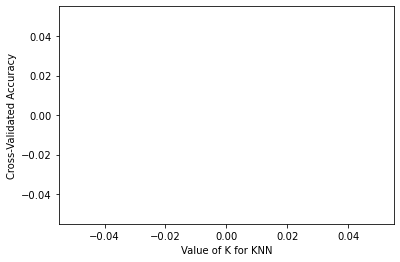

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Distribtiongraphs

In [152]:
distributioncode= df

In [153]:
distributioncode

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406.09,564.55,2312.23,4830.2,29075.97,621.10,5327.01,672.90,5877.10,...,2862.21,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,2011,3446.39,549.13,2366.10,4799.9,29764.48,642.30,5536.45,639.00,5838.20,...,2850.40,0.0,0.0,0.00,3446.00,0.00,0.00,0.00,0.00,0.0
2,2012,3412.01,513.98,2428.77,4926.8,29703.46,665.09,5379.30,637.40,6089.03,...,2861.17,0.0,0.0,0.00,3444.16,23.30,0.00,0.00,0.00,7932.5
3,2013,3474.77,510.99,2358.42,5025.8,30301.34,705.50,5581.14,606.60,5948.80,...,2869.58,0.0,0.0,0.00,3399.69,25.30,0.00,0.00,0.00,7938.5
4,2014,3689.44,494.54,2370.20,5109.7,31375.28,729.96,5801.96,614.60,6647.28,...,2931.25,0.0,0.0,0.00,3511.67,25.60,0.00,95.10,817.77,8625.7
5,2015,3988.15,488.50,2481.55,5278.2,31879.13,720.40,6585.09,602.60,6764.73,...,2933.16,0.0,0.0,1569.50,3457.43,23.40,0.00,105.20,861.81,8934.2
6,2016,3881.63,524.04,2793.20,5364.2,31972.73,714.72,6853.50,601.50,6938.97,...,2862.23,0.0,0.0,1572.10,3406.80,23.80,0.00,102.90,844.63,9213.5
7,2017,4025.42,578.79,2979.34,5506.3,31937.02,726.79,7480.40,602.50,7027.67,...,2816.66,0.0,0.0,1542.90,3409.54,25.40,0.00,109.60,862.08,9111.7
8,2018,4178.89,643.00,3033.02,5615.0,32490.95,748.07,7812.60,620.90,7117.01,...,2760.23,0.0,0.0,1565.20,3426.38,28.00,113.83,120.60,867.14,10034.2
9,2019,4288.23,651.51,3073.49,5615.0,32442.21,763.12,8225.70,632.97,7251.37,...,2704.39,0.0,0.0,1526.40,3372.09,27.93,104.72,123.70,0.00,9506.0


In [154]:
from numpy import random

random = random.normal(size=(2, 3))

print(random)

[[ 0.24853063 -0.03124534 -0.13947396]
 [-0.19065598  0.44863753 -0.99242977]]


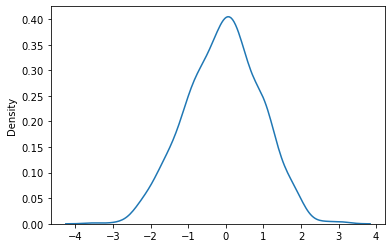

In [155]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=1000), hist=False)

plt.show()

In [156]:
#n= number of trials, p= proabability of it occuring , size= shape of returing
binom = random.binomial(n=10, p=0.5, size=10)

print (binom)

[5 4 4 6 2 7 5 5 5 6]


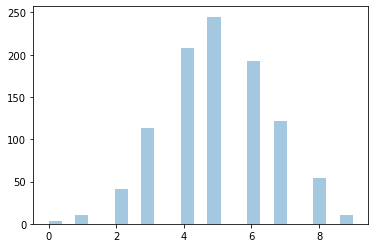

In [157]:
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

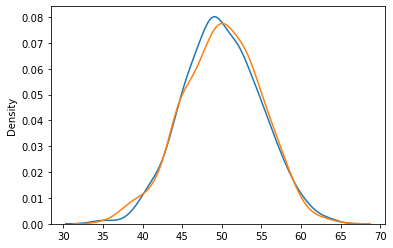

In [158]:
#showing the difference in normal and binomincal distribution
sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=False, label='normal')
sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

plt.show()

In [159]:

meanofcvtest=CV_test['Belgium'].mean()
print (meanofcvtest)


4095.25


In [160]:
medianofcvtest=CV_test['Belgium'].median()
print (medianofcvtest)

4130.5


In [161]:
modeofcvtest= CV_test['Belgium'].mode()
print (modeofcvtest)

0    3689
1    3881
2    4380
3    4431
Name: Belgium, dtype: int32


In [162]:
distributioncode['Ireland']. apply(int)

0     5327
1     5536
2     5379
3     5581
4     5801
5     6585
6     6853
7     7480
8     7812
9     8225
10    8541
11    9021
Name: Ireland, dtype: int64

In [163]:
distributioncode.describe()

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,3883.571667,572.036667,2709.756667,5281.758333,31286.421667,718.655833,6845.495833,629.128333,6702.229167,...,2833.853333,0.0,0.0,908.052500,3136.135833,16.894167,18.212500,71.023333,504.406667,7599.108333
std,3.605551,390.252724,70.552521,352.969142,332.401112,1234.026981,54.513396,1340.904979,25.164788,615.877015,...,68.841880,0.0,0.0,801.687023,988.422139,12.564852,42.579557,53.173255,445.788459,3618.869822
min,2010.000000,3406.090000,488.500000,2312.230000,4799.900000,29075.970000,621.100000,5327.010000,601.500000,5838.200000,...,2704.390000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.750000,3467.675000,513.232500,2369.175000,5001.050000,30167.125000,695.397500,5569.967500,605.600000,6053.972500,...,2779.850000,0.0,0.0,0.000000,3380.327500,0.000000,0.000000,0.000000,0.000000,7937.000000
50%,2015.500000,3934.890000,556.840000,2637.375000,5321.200000,31908.075000,723.595000,6719.295000,626.935000,6851.850000,...,2855.785000,0.0,0.0,1534.650000,3408.170000,23.600000,0.000000,98.210000,831.200000,9022.950000
75%,2018.250000,4206.225000,645.127500,3043.137500,5615.000000,32090.100000,751.832500,7915.875000,642.412500,7150.600000,...,2864.067500,0.0,0.0,1566.275000,3444.620000,25.450000,0.000000,106.300000,863.345000,9589.775000
max,2021.000000,4431.000000,680.540000,3192.020000,5666.000000,32552.120000,799.240000,9021.100000,672.900000,7476.920000,...,2933.160000,0.0,0.0,1575.500000,3511.670000,28.000000,113.830000,123.700000,907.660000,10051.900000


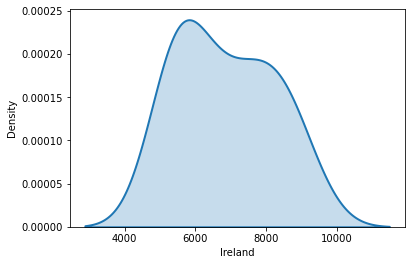

In [164]:
import seaborn as sns
sns.kdeplot(x=distributioncode['Ireland'], shade=True, linewidth=2);

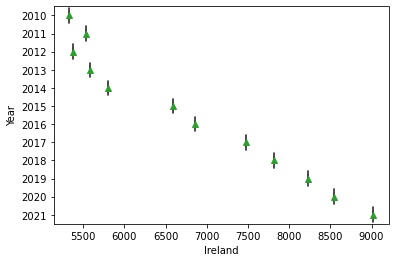

In [165]:
sns.boxplot(x=distributioncode['Ireland'], y=distributioncode['Year'].astype('category'), showmeans=True);

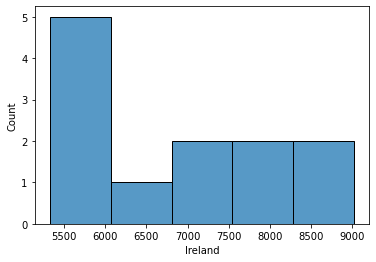

In [166]:
import seaborn as sns
sns.histplot(distributioncode.Ireland);

In [167]:
distributioncode=distributioncode.astype('int')

In [168]:
distributioncode

,Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Sweden,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey
0,2010,3406,564,2312,4830,29075,621,5327,672,5877,...,2862,0,0,0,0,0,0,0,0,0
1,2011,3446,549,2366,4799,29764,642,5536,639,5838,...,2850,0,0,0,3446,0,0,0,0,0
2,2012,3412,513,2428,4926,29703,665,5379,637,6089,...,2861,0,0,0,3444,23,0,0,0,7932
3,2013,3474,510,2358,5025,30301,705,5581,606,5948,...,2869,0,0,0,3399,25,0,0,0,7938
4,2014,3689,494,2370,5109,31375,729,5801,614,6647,...,2931,0,0,0,3511,25,0,95,817,8625
5,2015,3988,488,2481,5278,31879,720,6585,602,6764,...,2933,0,0,1569,3457,23,0,105,861,8934
6,2016,3881,524,2793,5364,31972,714,6853,601,6938,...,2862,0,0,1572,3406,23,0,102,844,9213
7,2017,4025,578,2979,5506,31937,726,7480,602,7027,...,2816,0,0,1542,3409,25,0,109,862,9111
8,2018,4178,643,3033,5615,32490,748,7812,620,7117,...,2760,0,0,1565,3426,28,113,120,867,10034
9,2019,4288,651,3073,5615,32442,763,8225,632,7251,...,2704,0,0,1526,3372,27,104,123,0,9506


In [169]:
from scipy import stats
from scipy.stats import norm

In [170]:
mu, std = stats.norm.fit(distributioncode.Ireland)
mu, std

(6845.083333333333, 1283.7563020509601)

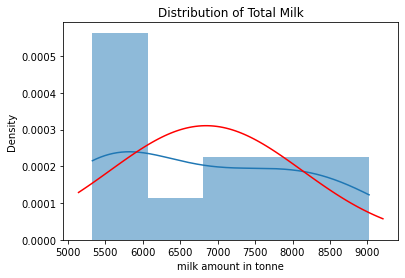

In [171]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=distributioncode.Ireland, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Total Milk", xlabel="milk amount in tonne")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="r", ax=ax)
plt.show()

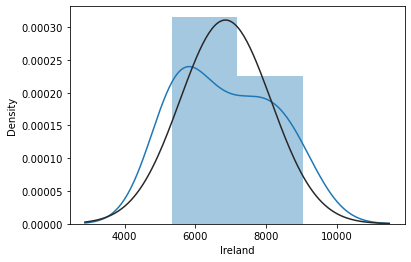

In [172]:
sns.distplot(distributioncode.Ireland, fit=stats.norm);

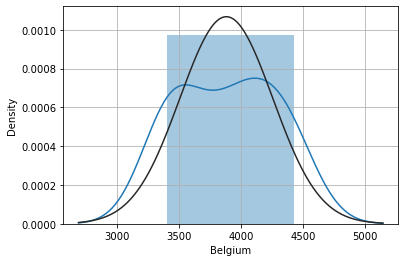

In [173]:
sns.distplot(distributioncode.Belgium, fit=stats.norm);
plt.grid()

In [174]:
#mainly right skewed distributions as the majorty of values are high